In [1]:
plt.style.use('ncr-paper.mplstyle')

In [2]:
import sys
sys.path.insert(0,'../../../')

In [3]:
import glob,os

In [4]:
scrdir='/scratch/gpfs/changgoo/TIGRESS-NCR/'

In [5]:
import pyathena as pa

[stellar-intel.princeton.edu:3527508] mca_base_component_repository_open: unable to open mca_op_avx: /usr/local/openmpi/4.1.0/gcc/lib64/openmpi/mca_op_avx.so: undefined symbol: ompi_op_base_module_t_class (ignored)


In [6]:
from pyathena.tigress_ncr.ncr_paper_lowz import PaperData,LowZData
from pyathena.tigress_ncr.ncr_paper_lowz import get_PW_zprof, get_PW_time_series_from_zprof

In [7]:
pdata = LowZData()

LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: vtk files found in vtk/???? --> need to call create_tar
LoadSimTIGRESSNCR-WARNING: vtk files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg3.Zd3.xy1024.eps1.e-8
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_

R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4-b10 LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy10

In [8]:
def plot_quantile(data,qmin=0.25,qmax=0.75,**kwargs):
    qd = data.quantile(dim='time',q=[qmin,0.5,qmax])
    l,=plt.plot(qd.z, qd.sel(quantile=0.5),**kwargs)
    plt.fill_between(qd.z, qd.sel(quantile=qmin),qd.sel(quantile=qmax),color=l.get_color(),alpha=0.25,lw=0)

# plt.yscale('log')

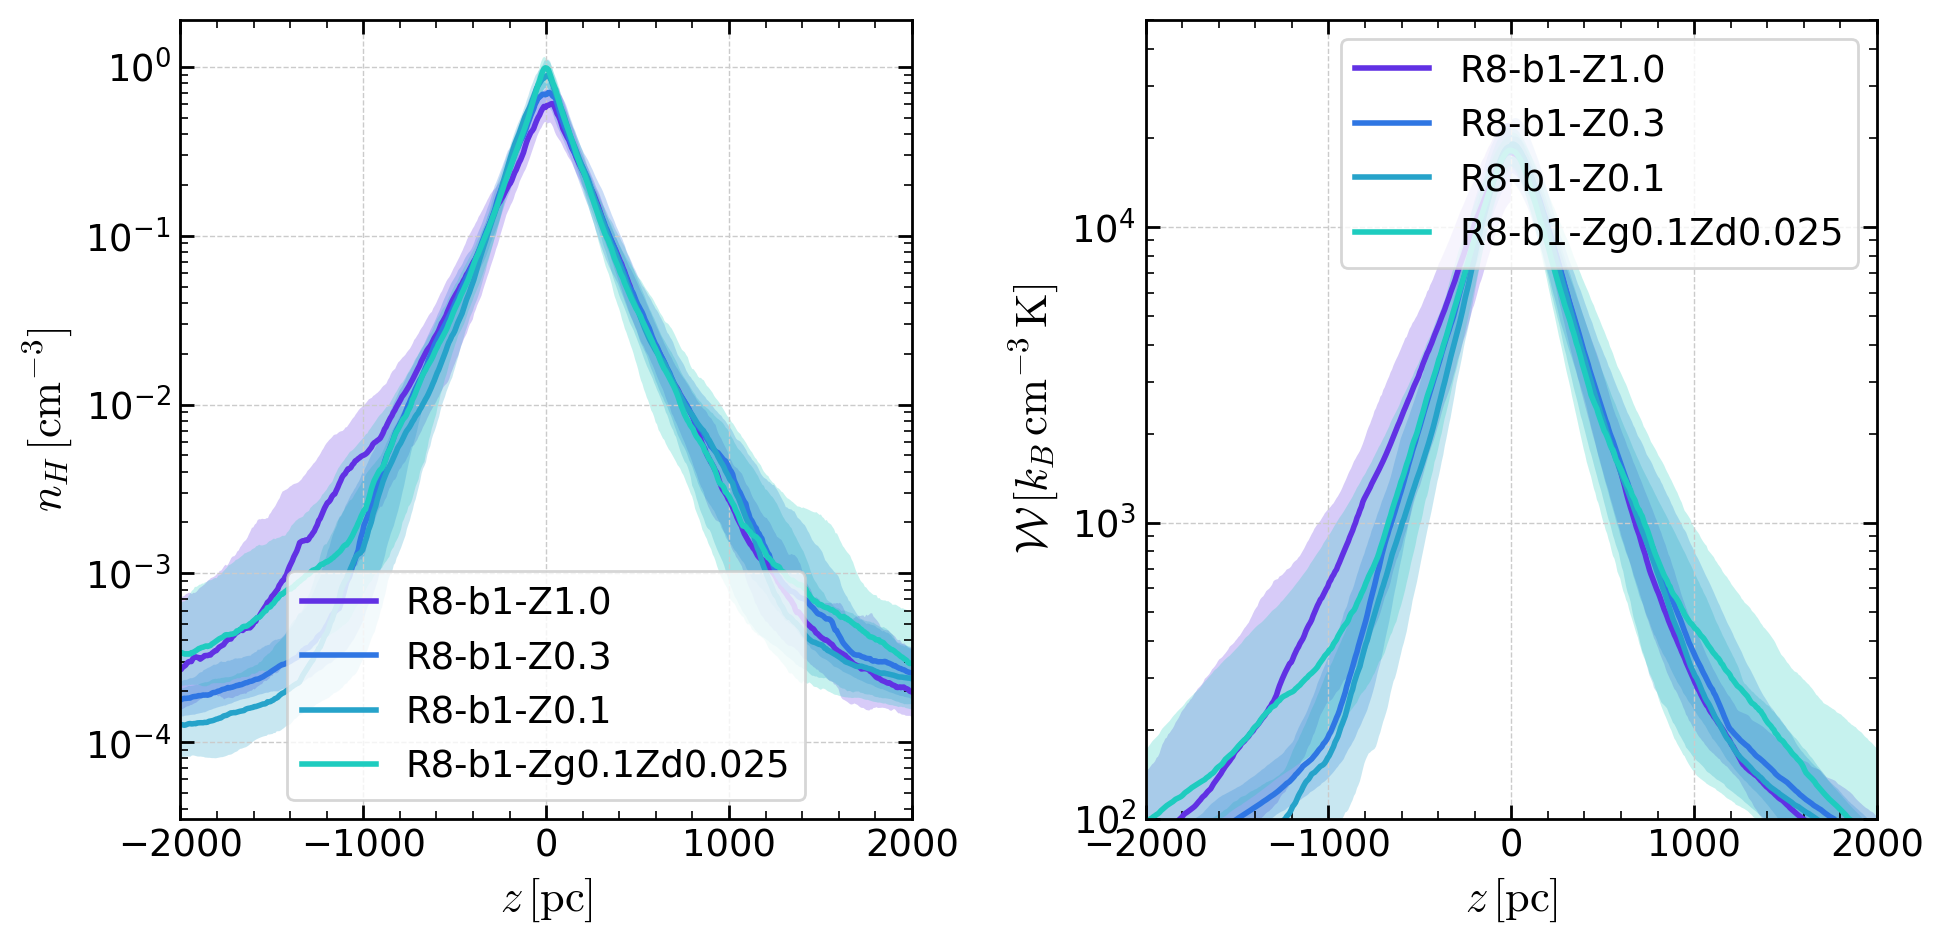

In [10]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
plt.sca(axes[0])
for m in pdata.mgroup['R8-b1']:
    s = pdata.sa.set_model(m)
    s.zprof = get_PW_zprof(s)
    zprof = s.zprof
    torb = pdata.torb_Myr['R8']

    plot_quantile(zprof['nH'].sum(dim='phase').sel(time=slice(torb*2,torb*5)),
                 color=s.color,ls=s.ls,label=s.name)
    # plot_quantile(zprof['Ptot'].sum(dim='phase').sel(time=slice(torb*2,torb*5))*s.u.pok)
plt.legend()
plt.yscale('log')
# plt.ylim(1.e2,5.e4)
plt.xlim(-2.e3,2.e3)
plt.xlabel(r'$z\,[{\rm pc}]$')
plt.ylabel(r'$n_H\,[{\rm cm^{-3}}]$')

plt.sca(axes[1])
for m in pdata.mgroup['R8-b1']:
    s = pdata.sa.set_model(m)
    zprof = s.zprof
    torb = pdata.torb_Myr['R8']

    plot_quantile(zprof['W'].sum(dim='phase').sel(time=slice(torb*2,torb*5))*s.u.pok,
                 color=s.color,ls=s.ls,label=s.name)
    # plot_quantile(zprof['Ptot'].sum(dim='phase').sel(time=slice(torb*2,torb*5))*s.u.pok)
plt.legend()
plt.yscale('log')
plt.ylim(1.e2,5.e4)
plt.xlim(-2.e3,2.e3)
plt.xlabel(r'$z\,[{\rm pc}]$')
plt.ylabel(r'$\mathcal{W}\,[k_B\,{\rm cm^{-3}\,K}]$')
plt.tight_layout()

In [9]:
import gc
gc.collect()

13853

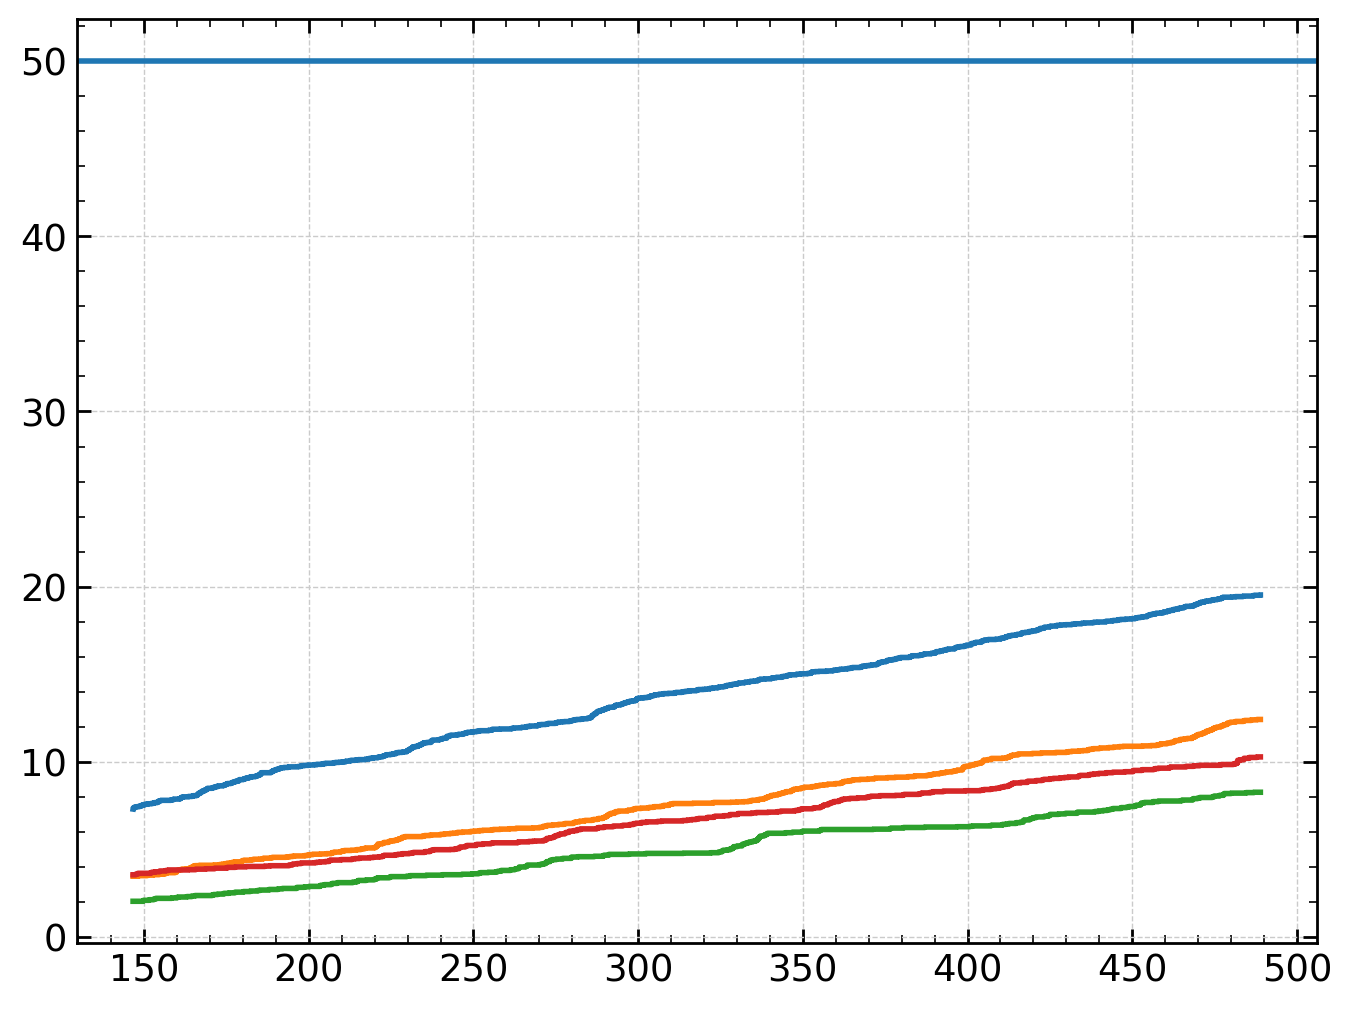

In [13]:
for m in pdata.mgroup['LGR4-b1']:
    s = pdata.sa.set_model(m)
    h = s.read_hst()
    plt.plot(h['time'],h['Sigma_sp'])
plt.axhline(s.par['problem']['SurfS'])

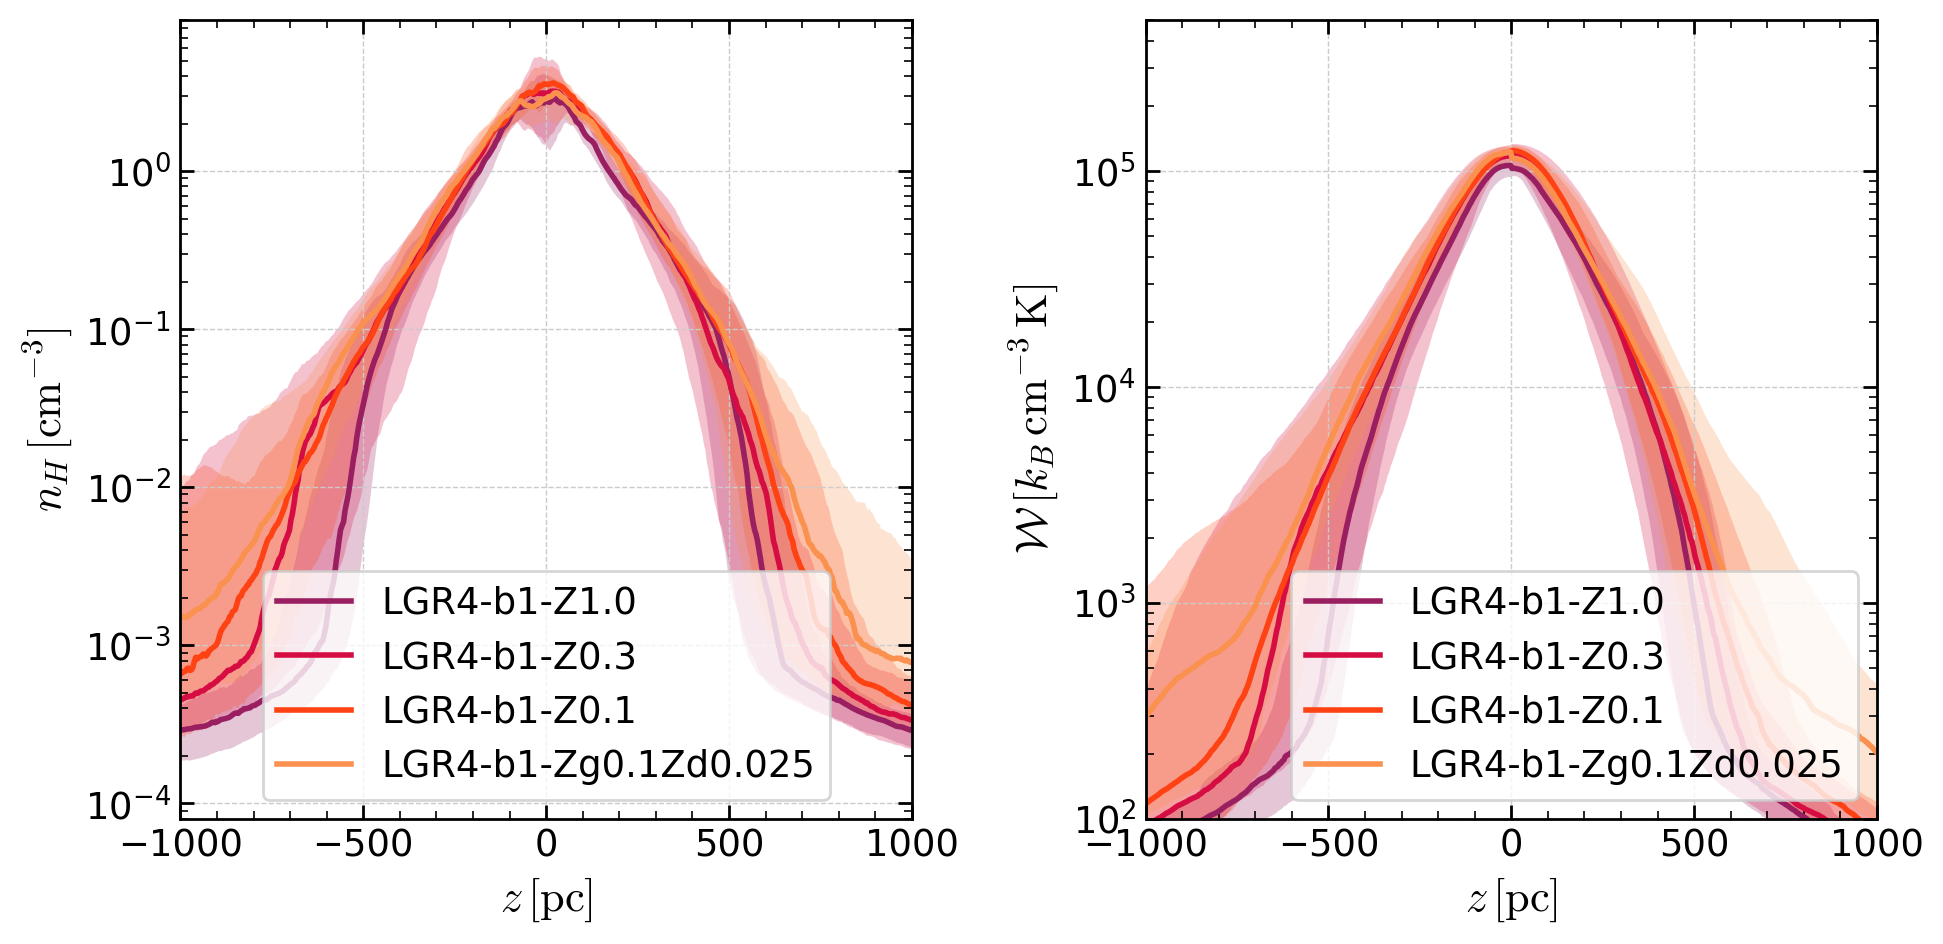

In [15]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
plt.sca(axes[0])
for m in pdata.mgroup['LGR4-b1']:
    s = pdata.sa.set_model(m)
    s.zprof = get_PW_zprof(s)
    zprof = s.zprof
    torb = pdata.torb_Myr['LGR4']

    plot_quantile(zprof['nH'].sum(dim='phase').sel(time=slice(torb*2,torb*5)),
                 color=s.color,ls=s.ls,label=s.name)
    # plot_quantile(zprof['Ptot'].sum(dim='phase').sel(time=slice(torb*2,torb*5))*s.u.pok)
plt.legend()
plt.yscale('log')
# plt.ylim(1.e2,5.e4)
plt.xlim(-1.e3,1.e3)
plt.xlabel(r'$z\,[{\rm pc}]$')
plt.ylabel(r'$n_H\,[{\rm cm^{-3}}]$')

plt.sca(axes[1])
for m in pdata.mgroup['LGR4-b1']:
    s = pdata.sa.set_model(m)
    zprof = s.zprof
    torb = pdata.torb_Myr['LGR4']

    plot_quantile(zprof['W'].sum(dim='phase').sel(time=slice(torb*2,torb*5))*s.u.pok,
                 color=s.color,ls=s.ls,label=s.name)
    # plot_quantile(zprof['Ptot'].sum(dim='phase').sel(time=slice(torb*2,torb*5))*s.u.pok)
plt.legend()
plt.yscale('log')
plt.ylim(1.e2,5.e5)
plt.xlim(-1.e3,1.e3)
plt.xlabel(r'$z\,[{\rm pc}]$')
plt.ylabel(r'$\mathcal{W}\,[k_B\,{\rm cm^{-3}\,K}]$')
plt.tight_layout()

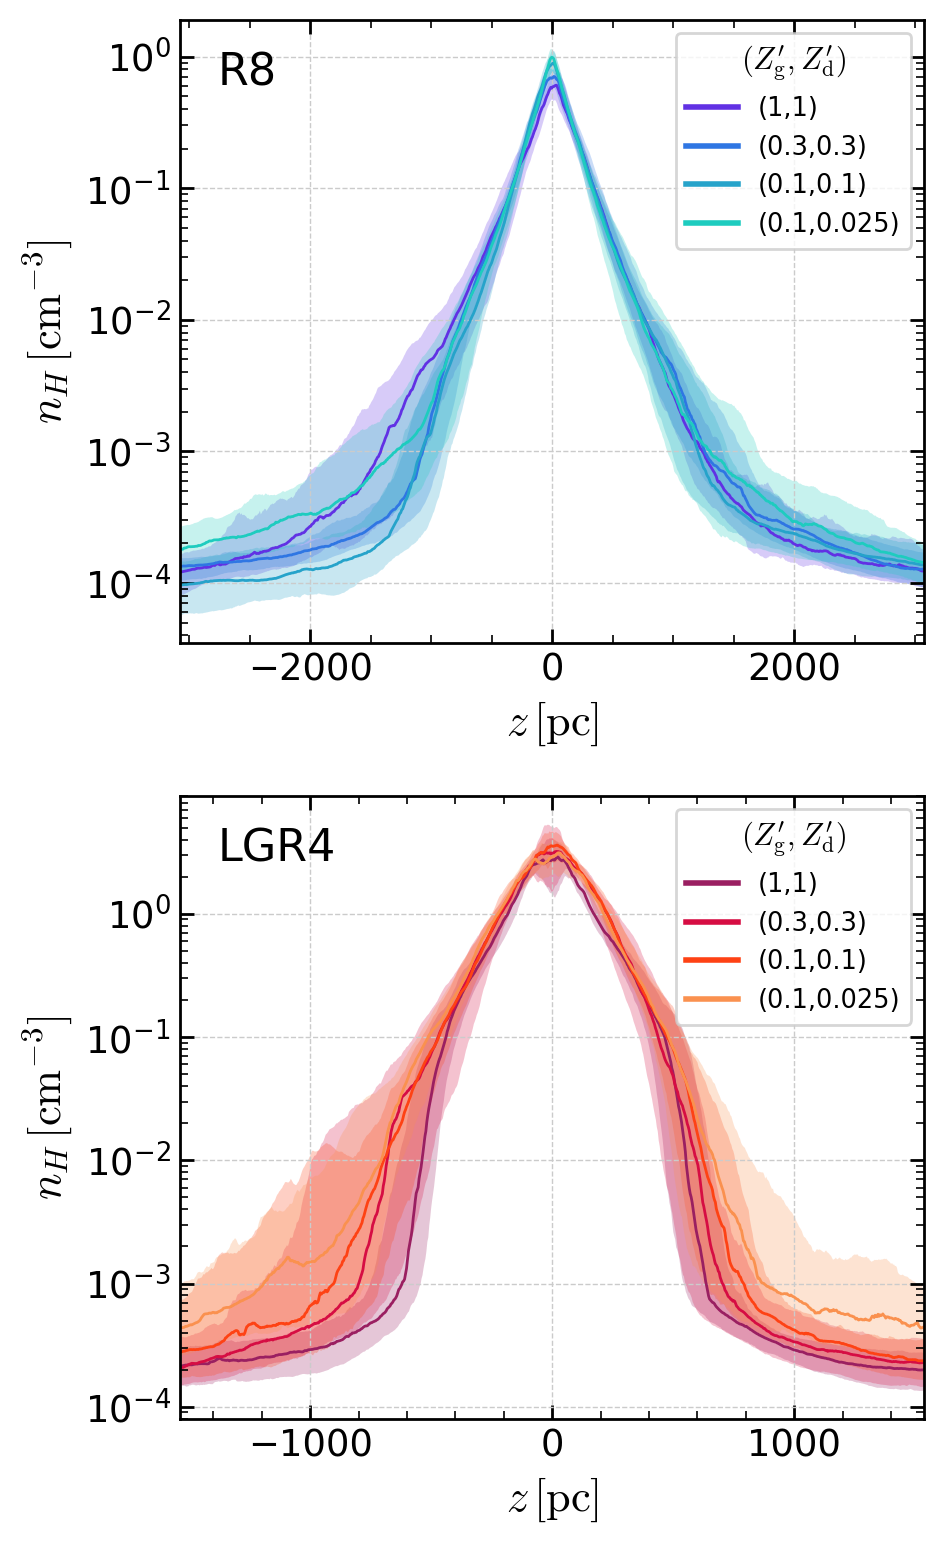

In [16]:
fig,axes = plt.subplots(2,1, figsize=(5,8), sharey='row')

for gr,ax in zip(['R8-b1','LGR4-b1'],axes):
    plt.sca(ax)
    for m in pdata.mgroup[gr]:
        s = pdata.sa.set_model(m)
        zprof = s.zprof
        torb = pdata.torb_Myr[gr.split('-')[0]]
        zmax = s.par['domain1']['x3max']
        trange = slice(torb*2,torb*5)

        nH = zprof['nH'].sum(dim='phase').sel(time=trange)
        plot_quantile(nH,color=s.color,lw=1,label=s.name)

    plt.yscale('log')
    plt.xlabel(r'$z\,[{\rm pc}]$')
    plt.xlim(-zmax,zmax)

for ax,kind in zip(axes,['R8','LGR4']):
    plt.sca(ax)
    plt.ylabel(r'$n_H\,[{\rm cm^{-3}}]$')
    pdata.add_legend(kind=kind,beta=False,title_fontsize='x-small',fontsize='xx-small',loc=1)
    plt.annotate(kind,(0.05,0.95),xycoords='axes fraction',ha='left',va='top')
plt.tight_layout()
plt.savefig(os.path.join(pdata.outdir,'nH_zprof.png'),bbox_inches='tight')

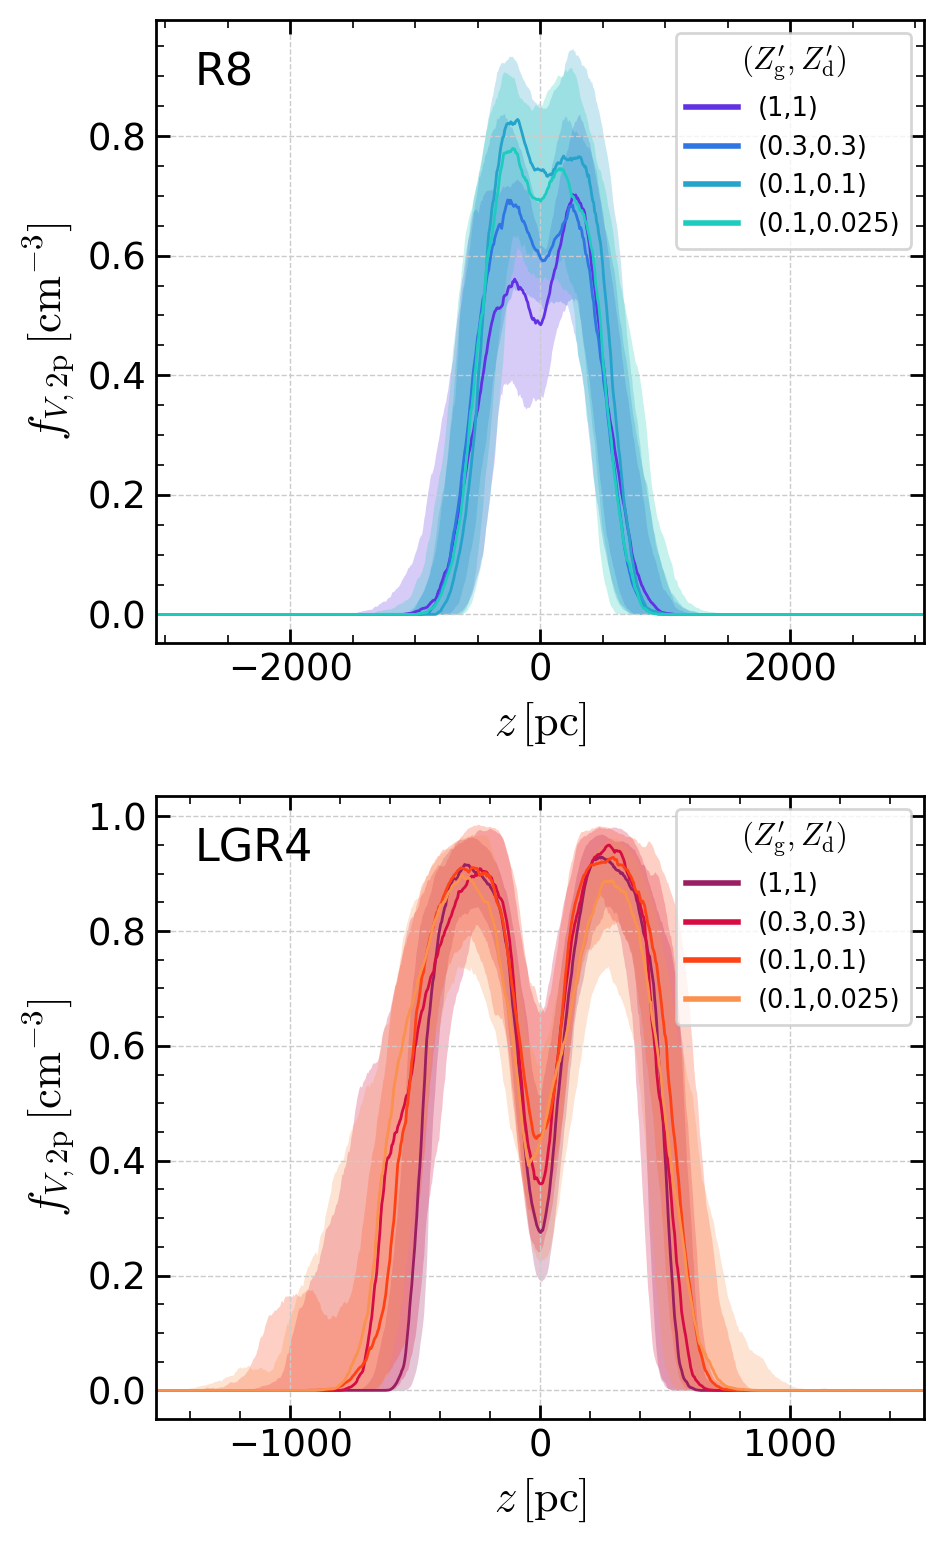

In [17]:
fig,axes = plt.subplots(2,1, figsize=(5,8), sharey='row')

for gr,ax in zip(['R8-b1','LGR4-b1'],axes):
    plt.sca(ax)
    for m in pdata.mgroup[gr]:
        s = pdata.sa.set_model(m)
        zprof = s.zprof
        torb = pdata.torb_Myr[gr.split('-')[0]]
        zmax = s.par['domain1']['x3max']
        trange = slice(torb*2,torb*5)

        f2p = zprof['A'].sel(phase='2p').sel(time=trange)
        plot_quantile(f2p,color=s.color,lw=1,label=s.name)

    plt.yscale('linear')
    plt.xlabel(r'$z\,[{\rm pc}]$')
    plt.xlim(-zmax,zmax)

for ax,kind in zip(axes,['R8','LGR4']):
    plt.sca(ax)
    plt.ylabel(r'$f_{V, {\rm 2p}}\,[{\rm cm^{-3}}]$')
    pdata.add_legend(kind=kind,beta=False,title_fontsize='x-small',fontsize='xx-small',loc=1)
    plt.annotate(kind,(0.05,0.95),xycoords='axes fraction',ha='left',va='top')
plt.tight_layout()
plt.savefig(os.path.join(pdata.outdir,'f2p_zprof.png'),bbox_inches='tight')

In [18]:
gc.collect()

33095

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


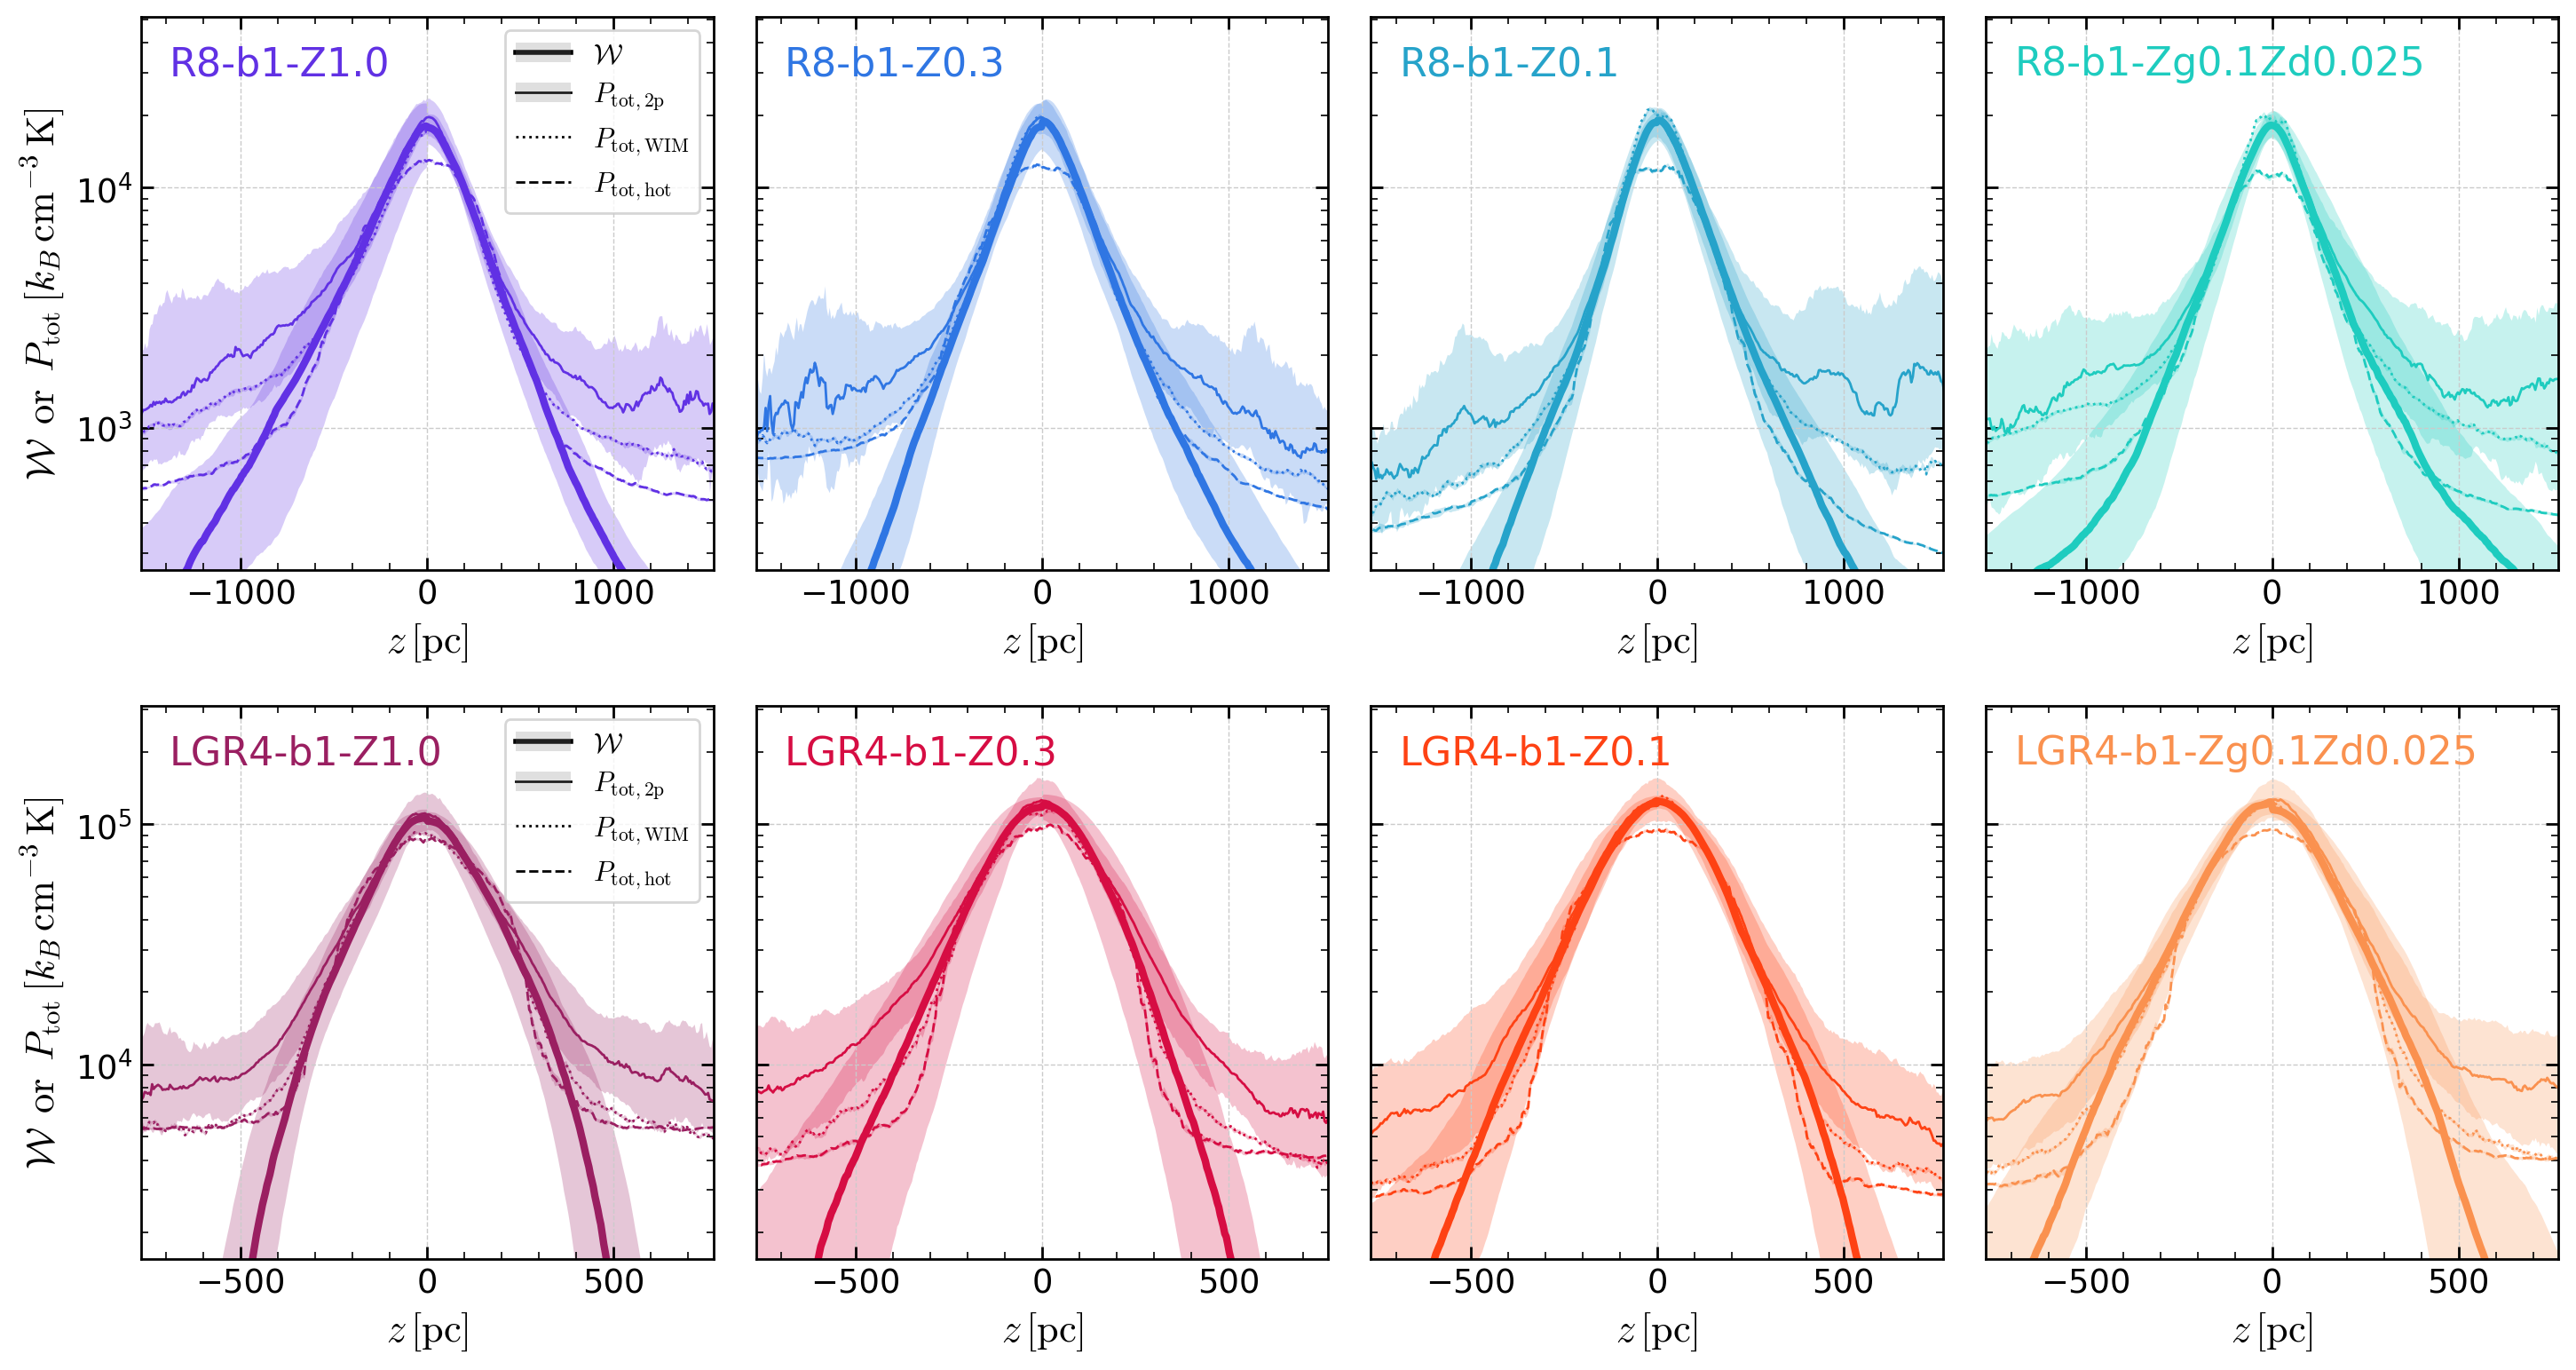

In [19]:
fig,axes = plt.subplots(2,4, figsize=(15,8), sharey='row')

for gr,axes_ in zip(['R8-b1','LGR4-b1'],axes):

    for m,ax in zip(pdata.mgroup[gr],axes_):
        plt.sca(ax)
        s = pdata.sa.set_model(m)
        zprof = s.zprof
        torb = pdata.torb_Myr[gr.split('-')[0]]
        hzmax = s.par['domain1']['x3max']*0.5
        trange = slice(torb*2,torb*5)
        # plt.sca(ax[0])
        W = zprof['W'].sum(dim='phase').sel(time=trange)*s.u.pok
        # Wmin = W.sel(z=hzmax,method='nearest').mean(dim='time').data
        Wmin = 0.
        plot_quantile(W-Wmin,color=s.color,lw=3,ls='-',label=s.name)
        # plt.sca(ax[1])
        P='Ptot'
        ph='2p'
        Pcomp = zprof[P].sel(phase=ph,time=trange)
        area = zprof['A'].sel(phase=ph,time=trange)
        Ptot = Pcomp/area*s.u.pok
        # Ptot = zprof['Ptot'].sum(dim='phase').sel(time=trange)*s.u.pok
        # Pmin = Ptot.sel(z=hzmax,method='nearest').mean(dim='time').data
        Pmin =0.
        plot_quantile(Ptot-Pmin,color=s.color,lw=1,label=s.name)
        for ph,ls in zip(['WIM','hot'],[':','--']):
            Pcomp = zprof[P].sel(phase=ph,time=trange)
            area = zprof['A'].sel(phase=ph,time=trange)
            Ptot = Pcomp/area*s.u.pok
            Pmin=0.
            plot_quantile(Ptot-Pmin,qmin=0.49,qmax=0.51,color=s.color,lw=1,label=s.name,ls=ls)
        Wmax = W.max().data


    # plt.legend()
    # for ax_ in ax:
        # plt.sca(ax_)
        plt.yscale('log')
        plt.ylim(0.01*Wmax,2*Wmax)
        plt.xlim(-hzmax,hzmax)
        name = pdata.get_model_name(s,beta=True)
        plt.annotate(name,(0.05,0.95),xycoords='axes fraction',ha='left',va='top',color=s.color)

        plt.xlabel(r'$z\,[{\rm pc}]$')

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
for ax in axes[:,0]:
    plt.sca(ax)
    plt.ylabel(r'$\mathcal{W}\,\,\,{\rm or}\,\,\,P_{\rm tot}\,[k_B\,{\rm cm^{-3}\,K}]$')

    labels = [r'$\mathcal{W}$',r'$P_{\rm tot,2p}$',r'$P_{\rm tot,WIM}$',r'$P_{\rm tot,hot}$']
    custom_lines2 = [(Line2D([0], [0], ls = '-', color='k', lw=2),Patch(facecolor='gray',alpha=0.25)),
                     (Line2D([0], [0], ls = '-', color='k', lw=1),Patch(facecolor='gray',alpha=0.25)),
                    Line2D([0], [0], ls = ':', color='k', lw=1),
                    Line2D([0], [0], ls = '--', color='k', lw=1)]
    plt.legend(custom_lines2,labels,fontsize='x-small')
plt.tight_layout()
plt.savefig(os.path.join(pdata.outdir,'W_P_zprof.png'),bbox_inches='tight')

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, ax

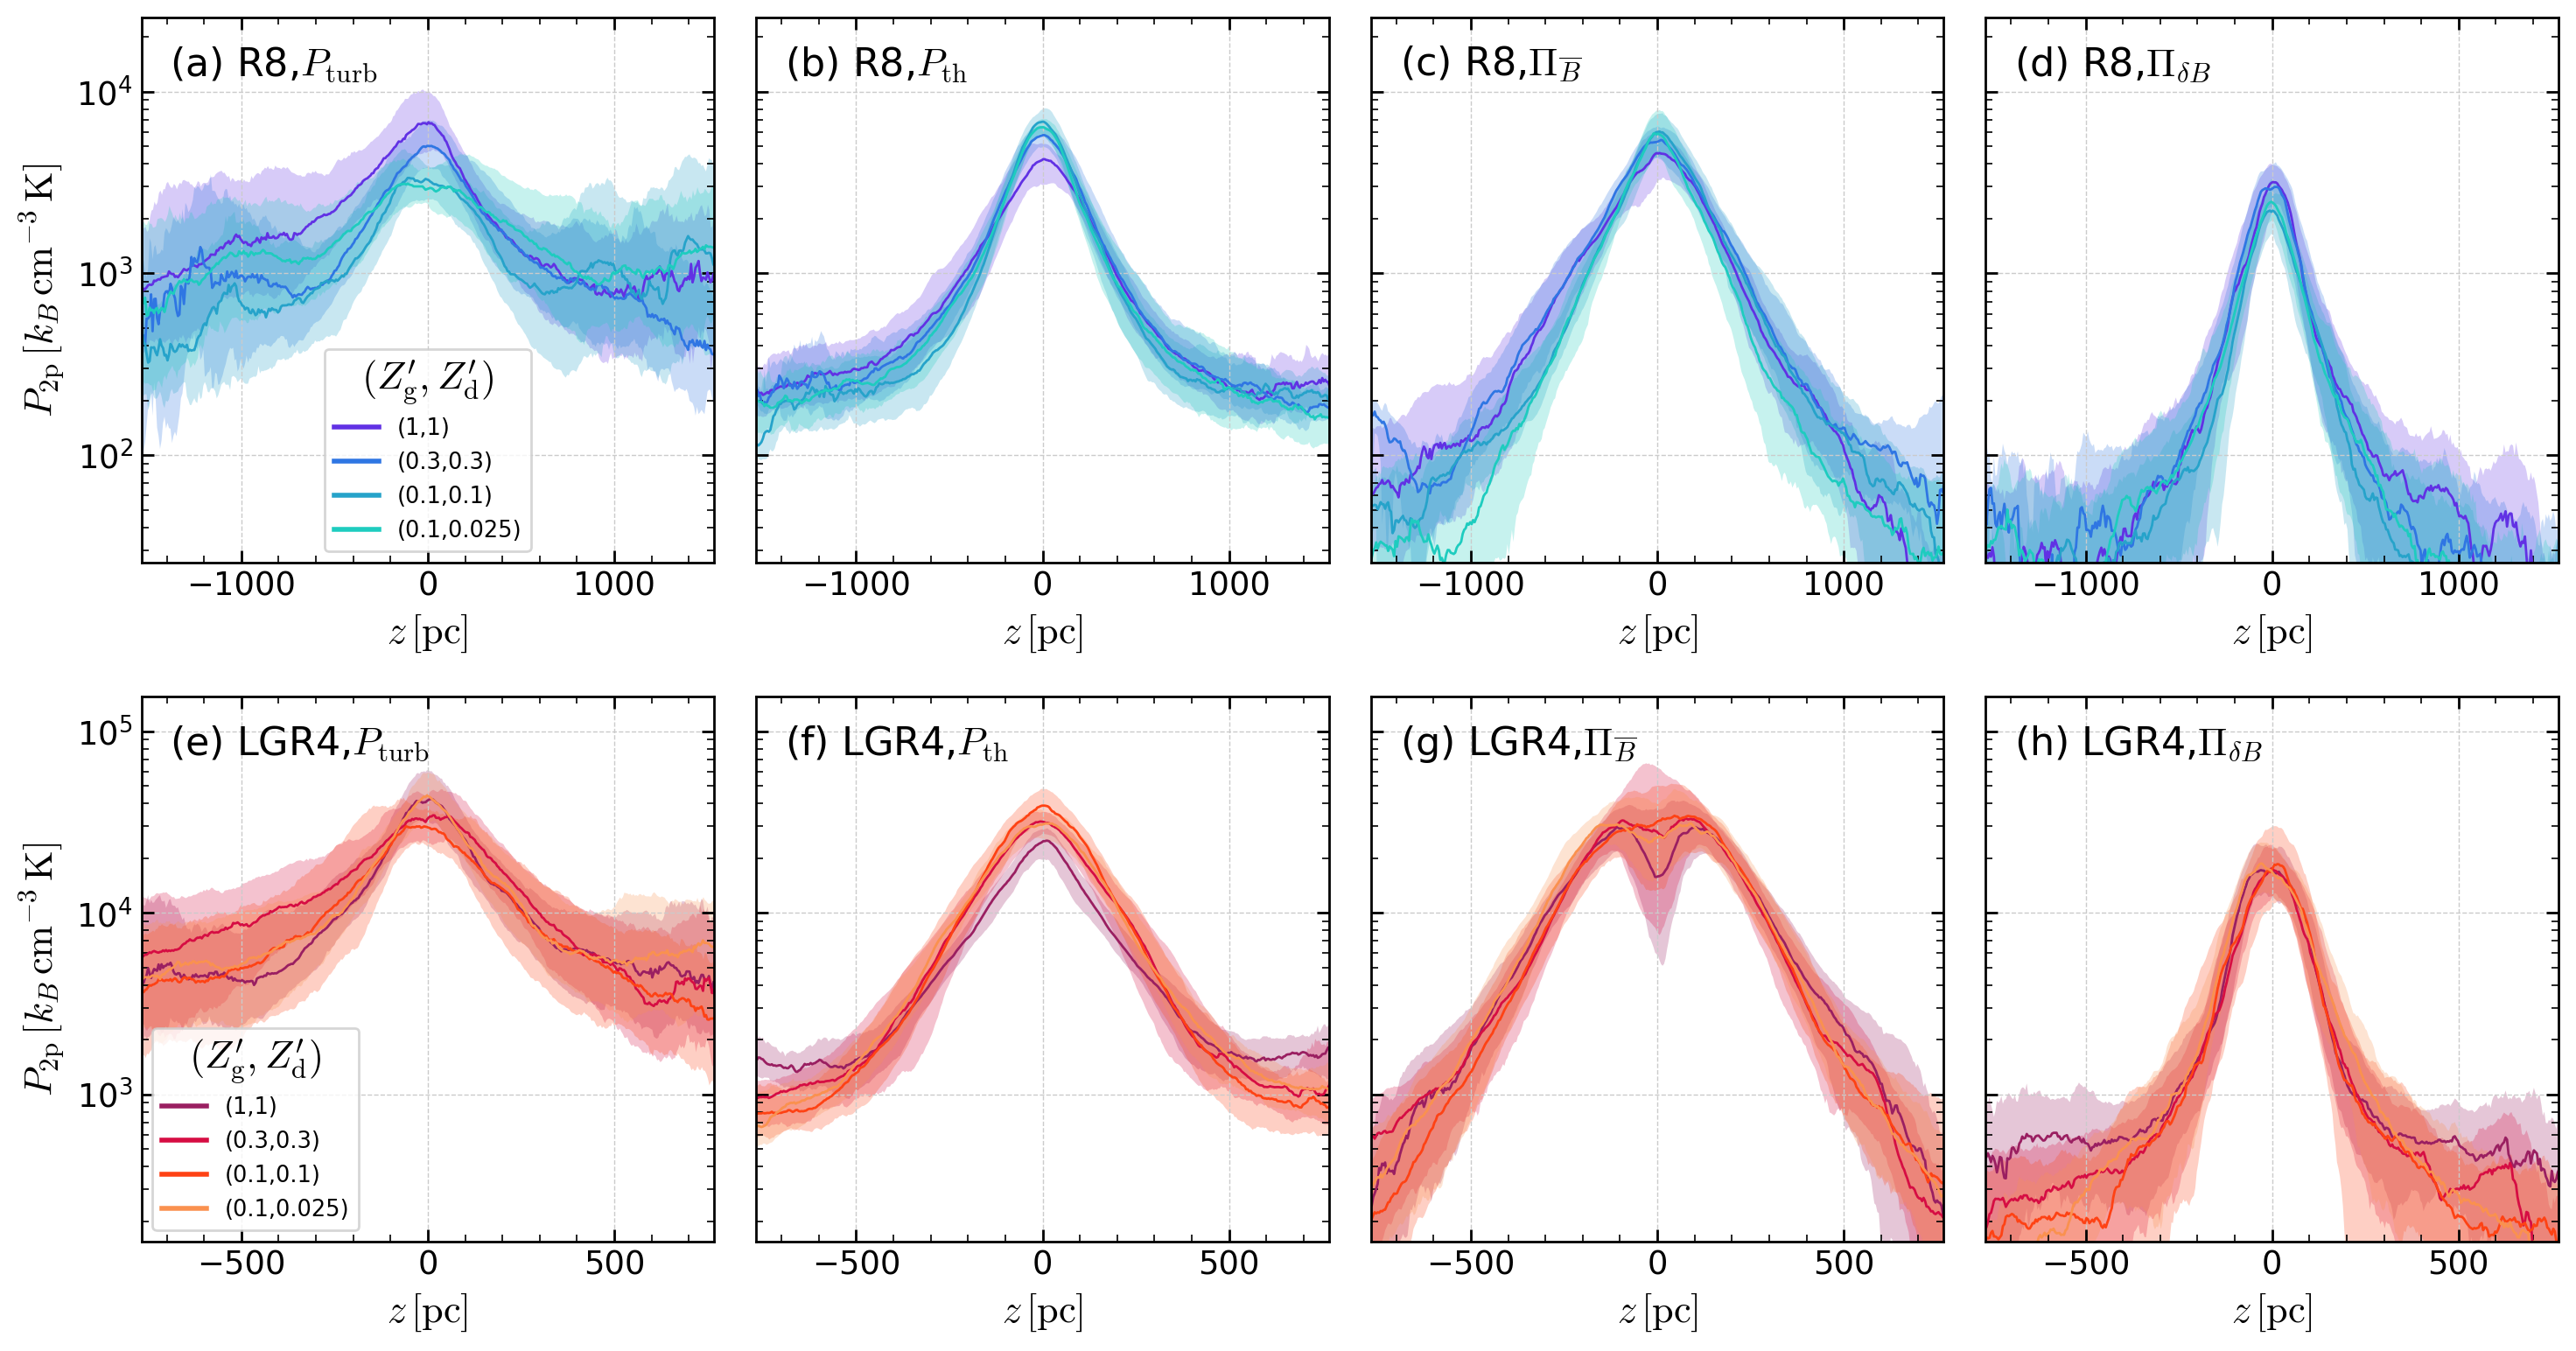

In [20]:
fig,axes = plt.subplots(2,4, figsize=(15,8),sharey='row')


for gr,axes_ in zip(['R8-b1','LGR4-b1'],axes):
    for m in pdata.mgroup[gr]:
        s = pdata.sa.set_model(m)
        hzmax = s.par['domain1']['x3max']*0.5
        zprof = s.zprof
        grhead=gr.split('-')[0]
        torb = pdata.torb_Myr[grhead]
        ph = '2p'
        trange = slice(torb*2,torb*5)
        for ax,P in zip(axes_,['Pturb','Pth','oPimag','dPimag']):
            plt.sca(ax)
            Pcomp = zprof[P].sel(phase=ph,time=trange)
            area = zprof['A'].sel(phase=ph,time=trange)
            Pcomp = Pcomp/area*s.u.pok
            plot_quantile(Pcomp,color=s.color,lw=1,label=s.name)

            plt.yscale('log')
            plt.xlim(-hzmax,hzmax)
            plt.xlabel(r'$z\,[{\rm pc}]$')
        W = zprof['W'].sum(dim='phase').sel(time=trange)*s.u.pok
        Wmax = W.max().data
        plt.ylim(0.001*Wmax,Wmax)


for ax,kind in zip(axes[:,0],['R8','LGR4']):
    plt.sca(ax)
    plt.ylabel(r'$P_{\rm 2p}\,[k_B\,{\rm cm^{-3}\,K}]$')
    pdata.add_legend(kind=kind,beta=False,fontsize='xx-small')

# labeling
import string
labels = string.ascii_lowercase
ilab = 0
attrs = pdata.set_zprof_attr()
for axes_,grhead in zip(axes,['R8','LGR4']):
    for ax,P in zip(axes_,['Pturb','Pth','oPimag','dPimag']):
        plt.sca(ax)
        plt.annotate('({}) {},'.format(labels[ilab],grhead)+attrs['Plabels'][P],(0.05,0.95),
                 xycoords='axes fraction',ha='left',va='top')
        ilab += 1

plt.tight_layout()
plt.savefig(os.path.join(pdata.outdir,'Pcomp_zprof.png'),bbox_inches='tight')

In [11]:
pdata.get_trange(s)

slice(438.83212290994425, 1097.0803072748606, None)

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, ax

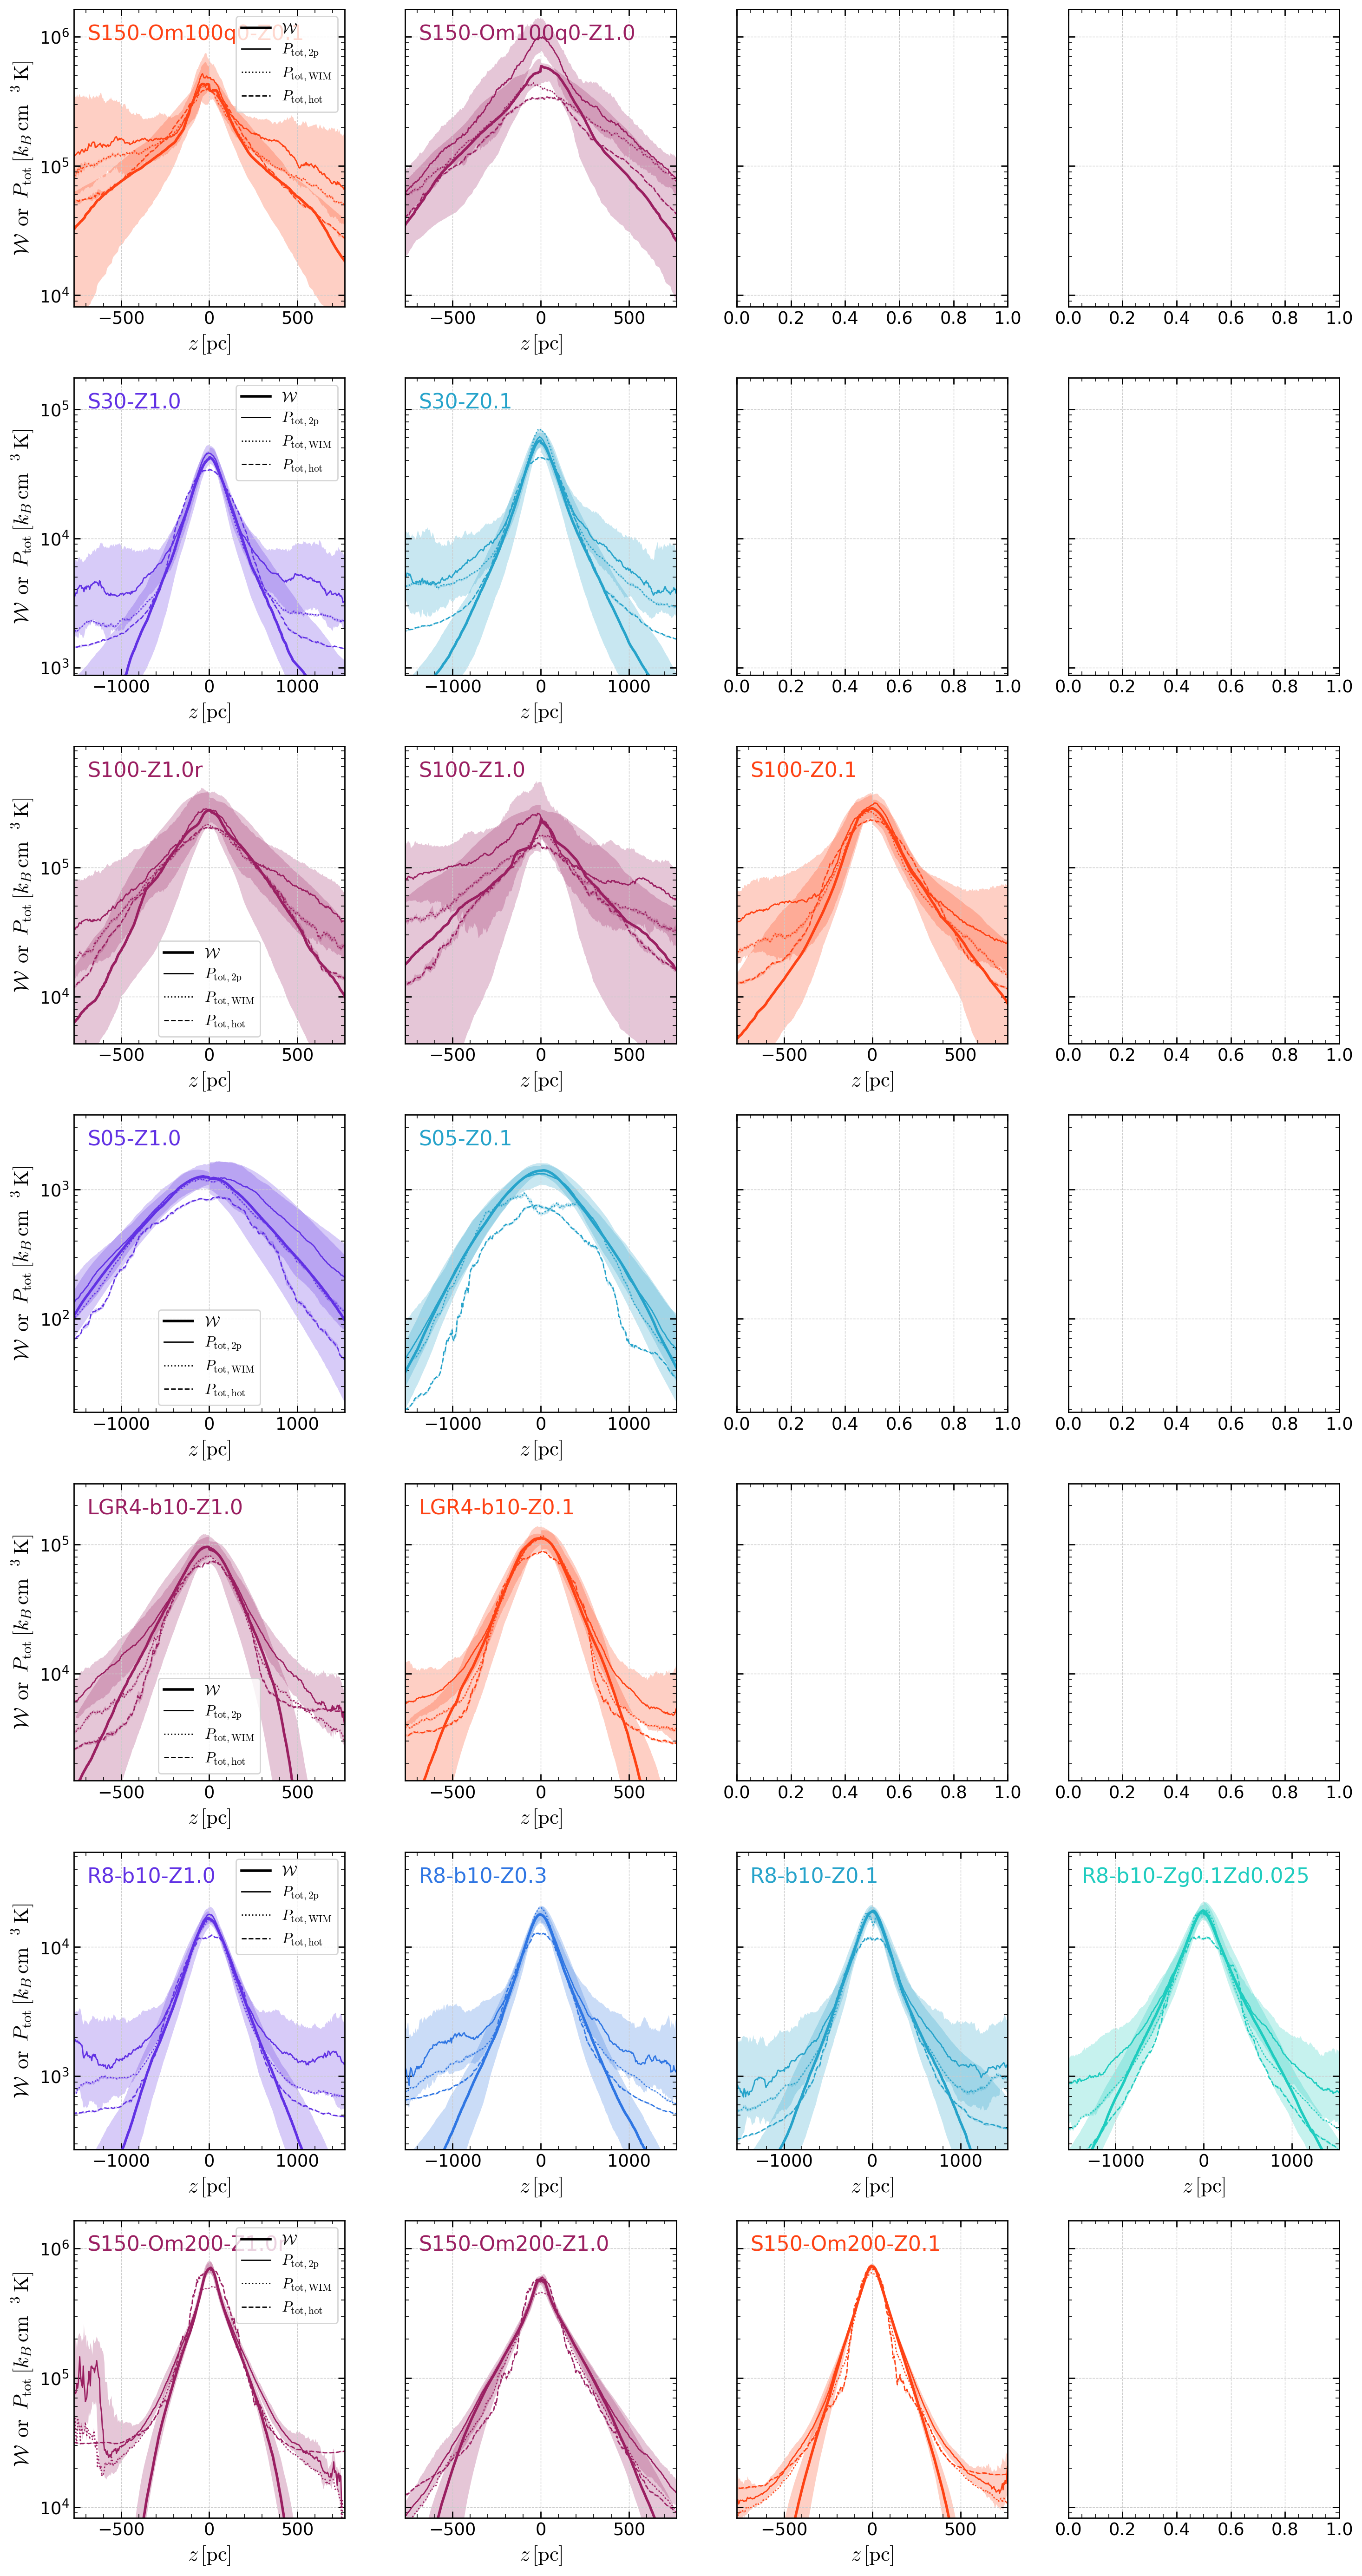

In [13]:
# fig,axes = plt.subplots(2,4, figsize=(15,8), sharey='row')
groups = list(set(pdata.mgroup.keys()) - {'R8','LGR4','R8-b1','LGR4-b1','LGR2-S150'})
ngroups = len(groups)

fig,axes = plt.subplots(ngroups,4, figsize=(15,4*ngroups), sharey='row')
for gr,axes_ in zip(groups,axes):

    for m,ax in zip(pdata.mgroup[gr],axes_):
        plt.sca(ax)
        s = pdata.sa.set_model(m)
        if not hasattr(s,'zprof'): s.zprof = get_PW_zprof(s)

        zprof = s.zprof
        # torb = pdata.torb[m]*s.u.Myr
        hzmax = s.par['domain1']['x3max']*0.5
        # if s.torb_Myr <50:
        #     trange = slice(s.torb_Myr*5,s.torb_Myr*15)
        # elif s.torb_Myr >300:
        #     trange = slice(s.torb_Myr*1.5,s.torb_Myr*5)
        # else:
        #     trange = slice(s.torb_Myr*2,s.torb_Myr*5)
        trange = pdata.get_trange(s)
        # plt.sca(ax[0])
        W = zprof['W'].sum(dim='phase').sel(time=trange)*s.u.pok
        # Wmin = W.sel(z=hzmax,method='nearest').mean(dim='time').data
        Wmin = 0.
        plot_quantile(W-Wmin,color=s.color,lw=2,ls='-',label=s.name)
        # plt.sca(ax[1])
        P='Ptot'
        ph='2p'
        Pcomp = zprof[P].sel(phase=ph,time=trange)
        area = zprof['A'].sel(phase=ph,time=trange)
        Ptot = Pcomp/area*s.u.pok
        # Ptot = zprof['Ptot'].sum(dim='phase').sel(time=trange)*s.u.pok
        # Pmin = Ptot.sel(z=hzmax,method='nearest').mean(dim='time').data
        Pmin =0.
        plot_quantile(Ptot-Pmin,color=s.color,lw=1,label=s.name)
        for ph,ls in zip(['WIM','hot'],[':','--']):
            Pcomp = zprof[P].sel(phase=ph,time=trange)
            area = zprof['A'].sel(phase=ph,time=trange)
            Ptot = Pcomp/area*s.u.pok
            Pmin=0.
            plot_quantile(Ptot-Pmin,qmin=0.49,qmax=0.51,color=s.color,lw=1,label=s.name,ls=ls)
        Wmax = W.max().data


    # plt.legend()
    # for ax_ in ax:
        # plt.sca(ax_)
        plt.yscale('log')
        plt.ylim(0.01*Wmax,2*Wmax)
        plt.xlim(-hzmax,hzmax)
        name = pdata.get_model_name(s,beta=True)
        plt.annotate(name,(0.05,0.95),xycoords='axes fraction',ha='left',va='top',color=s.color)

        plt.xlabel(r'$z\,[{\rm pc}]$')

from matplotlib.lines import Line2D
for ax in axes[:,0]:
    plt.sca(ax)
    plt.ylabel(r'$\mathcal{W}\,\,\,{\rm or}\,\,\,P_{\rm tot}\,[k_B\,{\rm cm^{-3}\,K}]$')

    labels = [r'$\mathcal{W}$',r'$P_{\rm tot,2p}$',r'$P_{\rm tot,WIM}$',r'$P_{\rm tot,hot}$']
    custom_lines2 = [Line2D([0], [0], ls = '-', color='k', lw=2),
                     Line2D([0], [0], ls = '-', color='k', lw=1),
                    Line2D([0], [0], ls = ':', color='k', lw=1),
                    Line2D([0], [0], ls = '--', color='k', lw=1)]
    plt.legend(custom_lines2,labels,fontsize='x-small')
plt.tight_layout()
# plt.savefig(os.path.join(pdata.outdir,'W_P_zprof.png'),bbox_inches='tight')

In [25]:
pdata.mgroup['LGR2-S150-Om100q0'][1]

'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8'

In [17]:
s = pdata.sa.set_model(pdata.mgroup['LGR2-S150-Om100q0'][1])

In [23]:
trange = pdata.get_trange(s)

In [24]:
trange

slice(122.8729944147844, 307.182486036961, None)

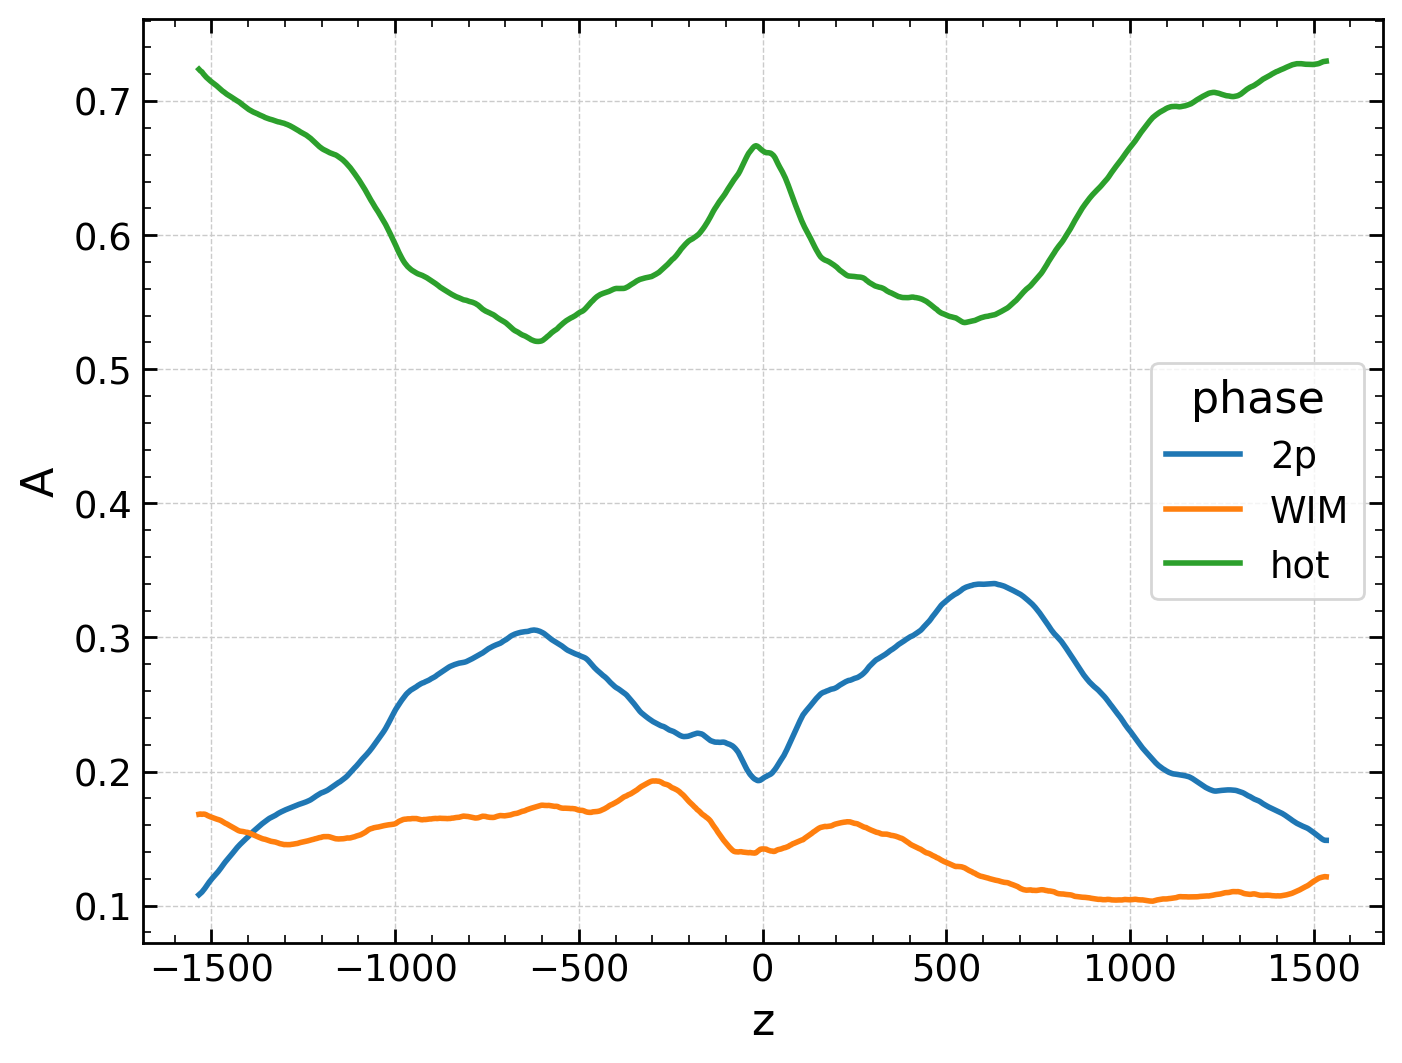

In [35]:
s.zprof['A'].mean(dim='time').plot(hue='phase')

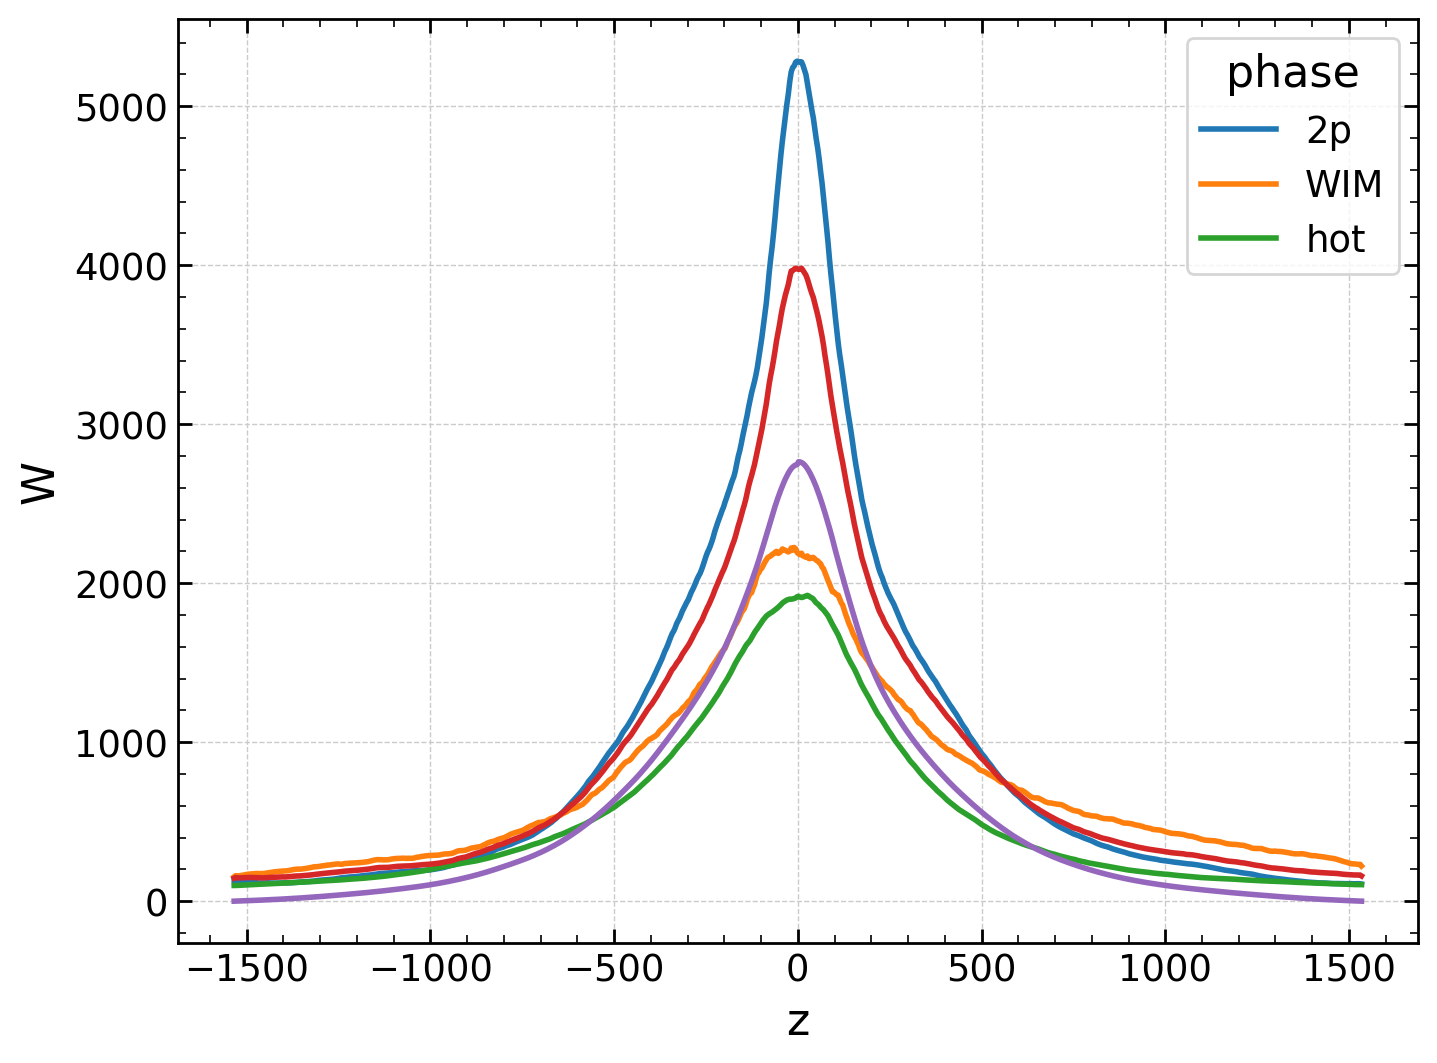

In [34]:
(s.zprof['Ptot'].mean(dim='time')/s.zprof['A'].mean(dim='time')).plot(hue='phase')
(s.zprof['Ptot'].sel(phase=['2p','WIM']).sum(dim='phase').mean(dim='time')/s.zprof['A'].sel(phase=['2p','WIM']).sum(dim='phase').mean(dim='time')).plot()
s.zprof['W'].sum(dim='phase').mean(dim='time').plot()

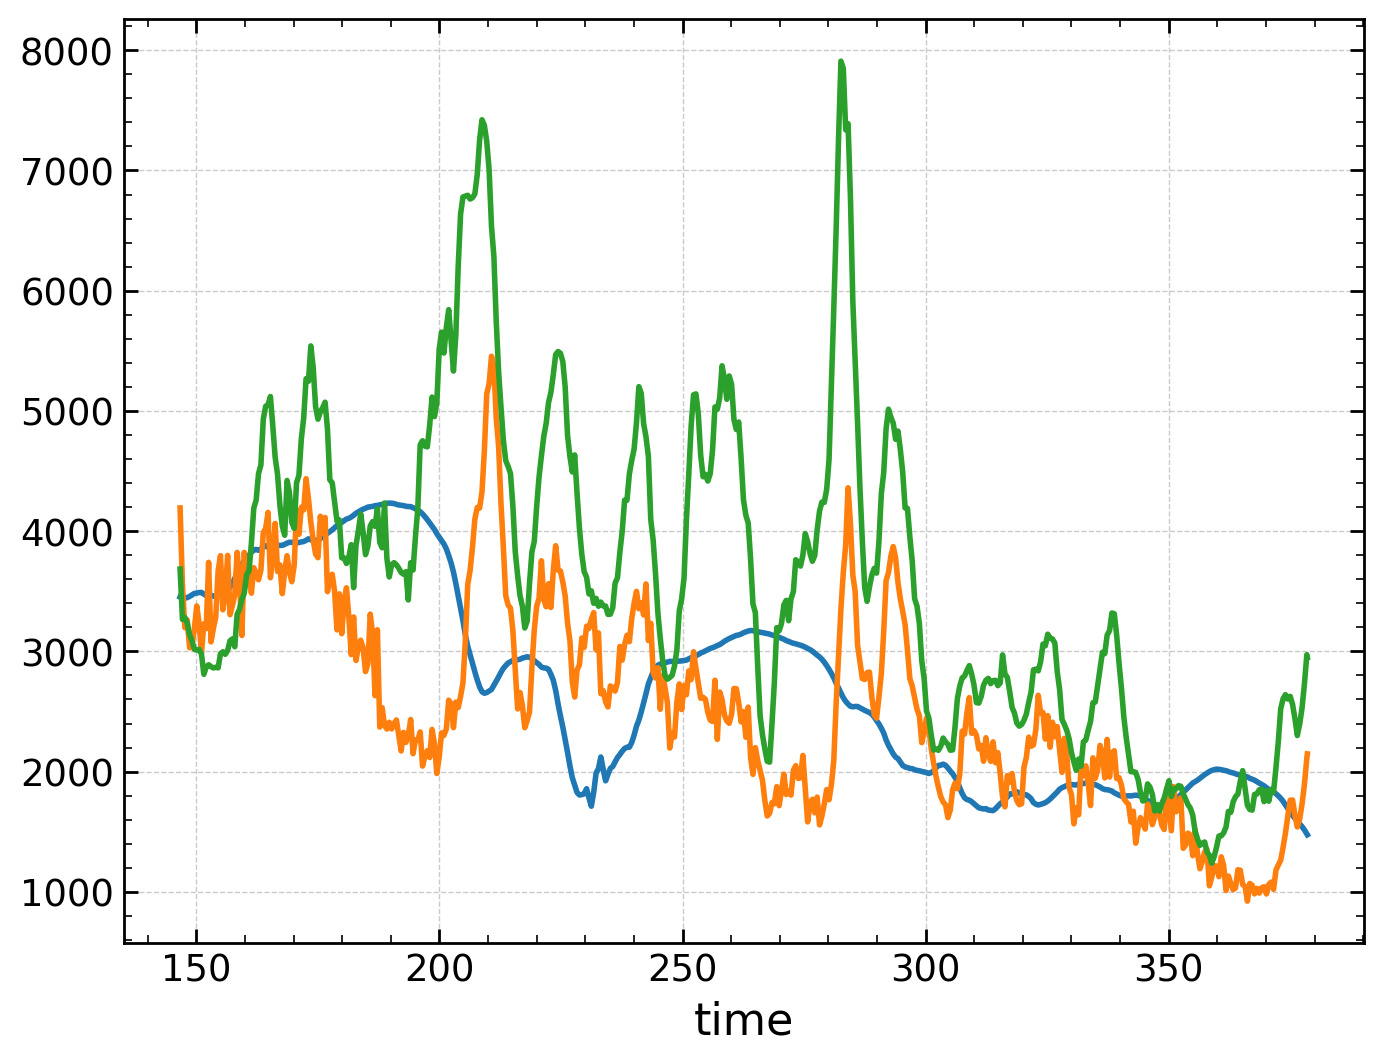

In [31]:
s.zprof['W'].sum(dim='phase').sel(z=slice(-50,50)).mean(dim='z').plot()
s.zprof['Ptot'].sum(dim='phase').sel(z=slice(-50,50)).mean(dim='z').plot()
(s.zprof['Ptot'].sel(phase=['2p','WIM']).sum(dim='phase')/s.zprof['A'].sel(phase=['2p','WIM']).sum(dim='phase')).sel(z=slice(-100,100)).mean(dim='z').plot()

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


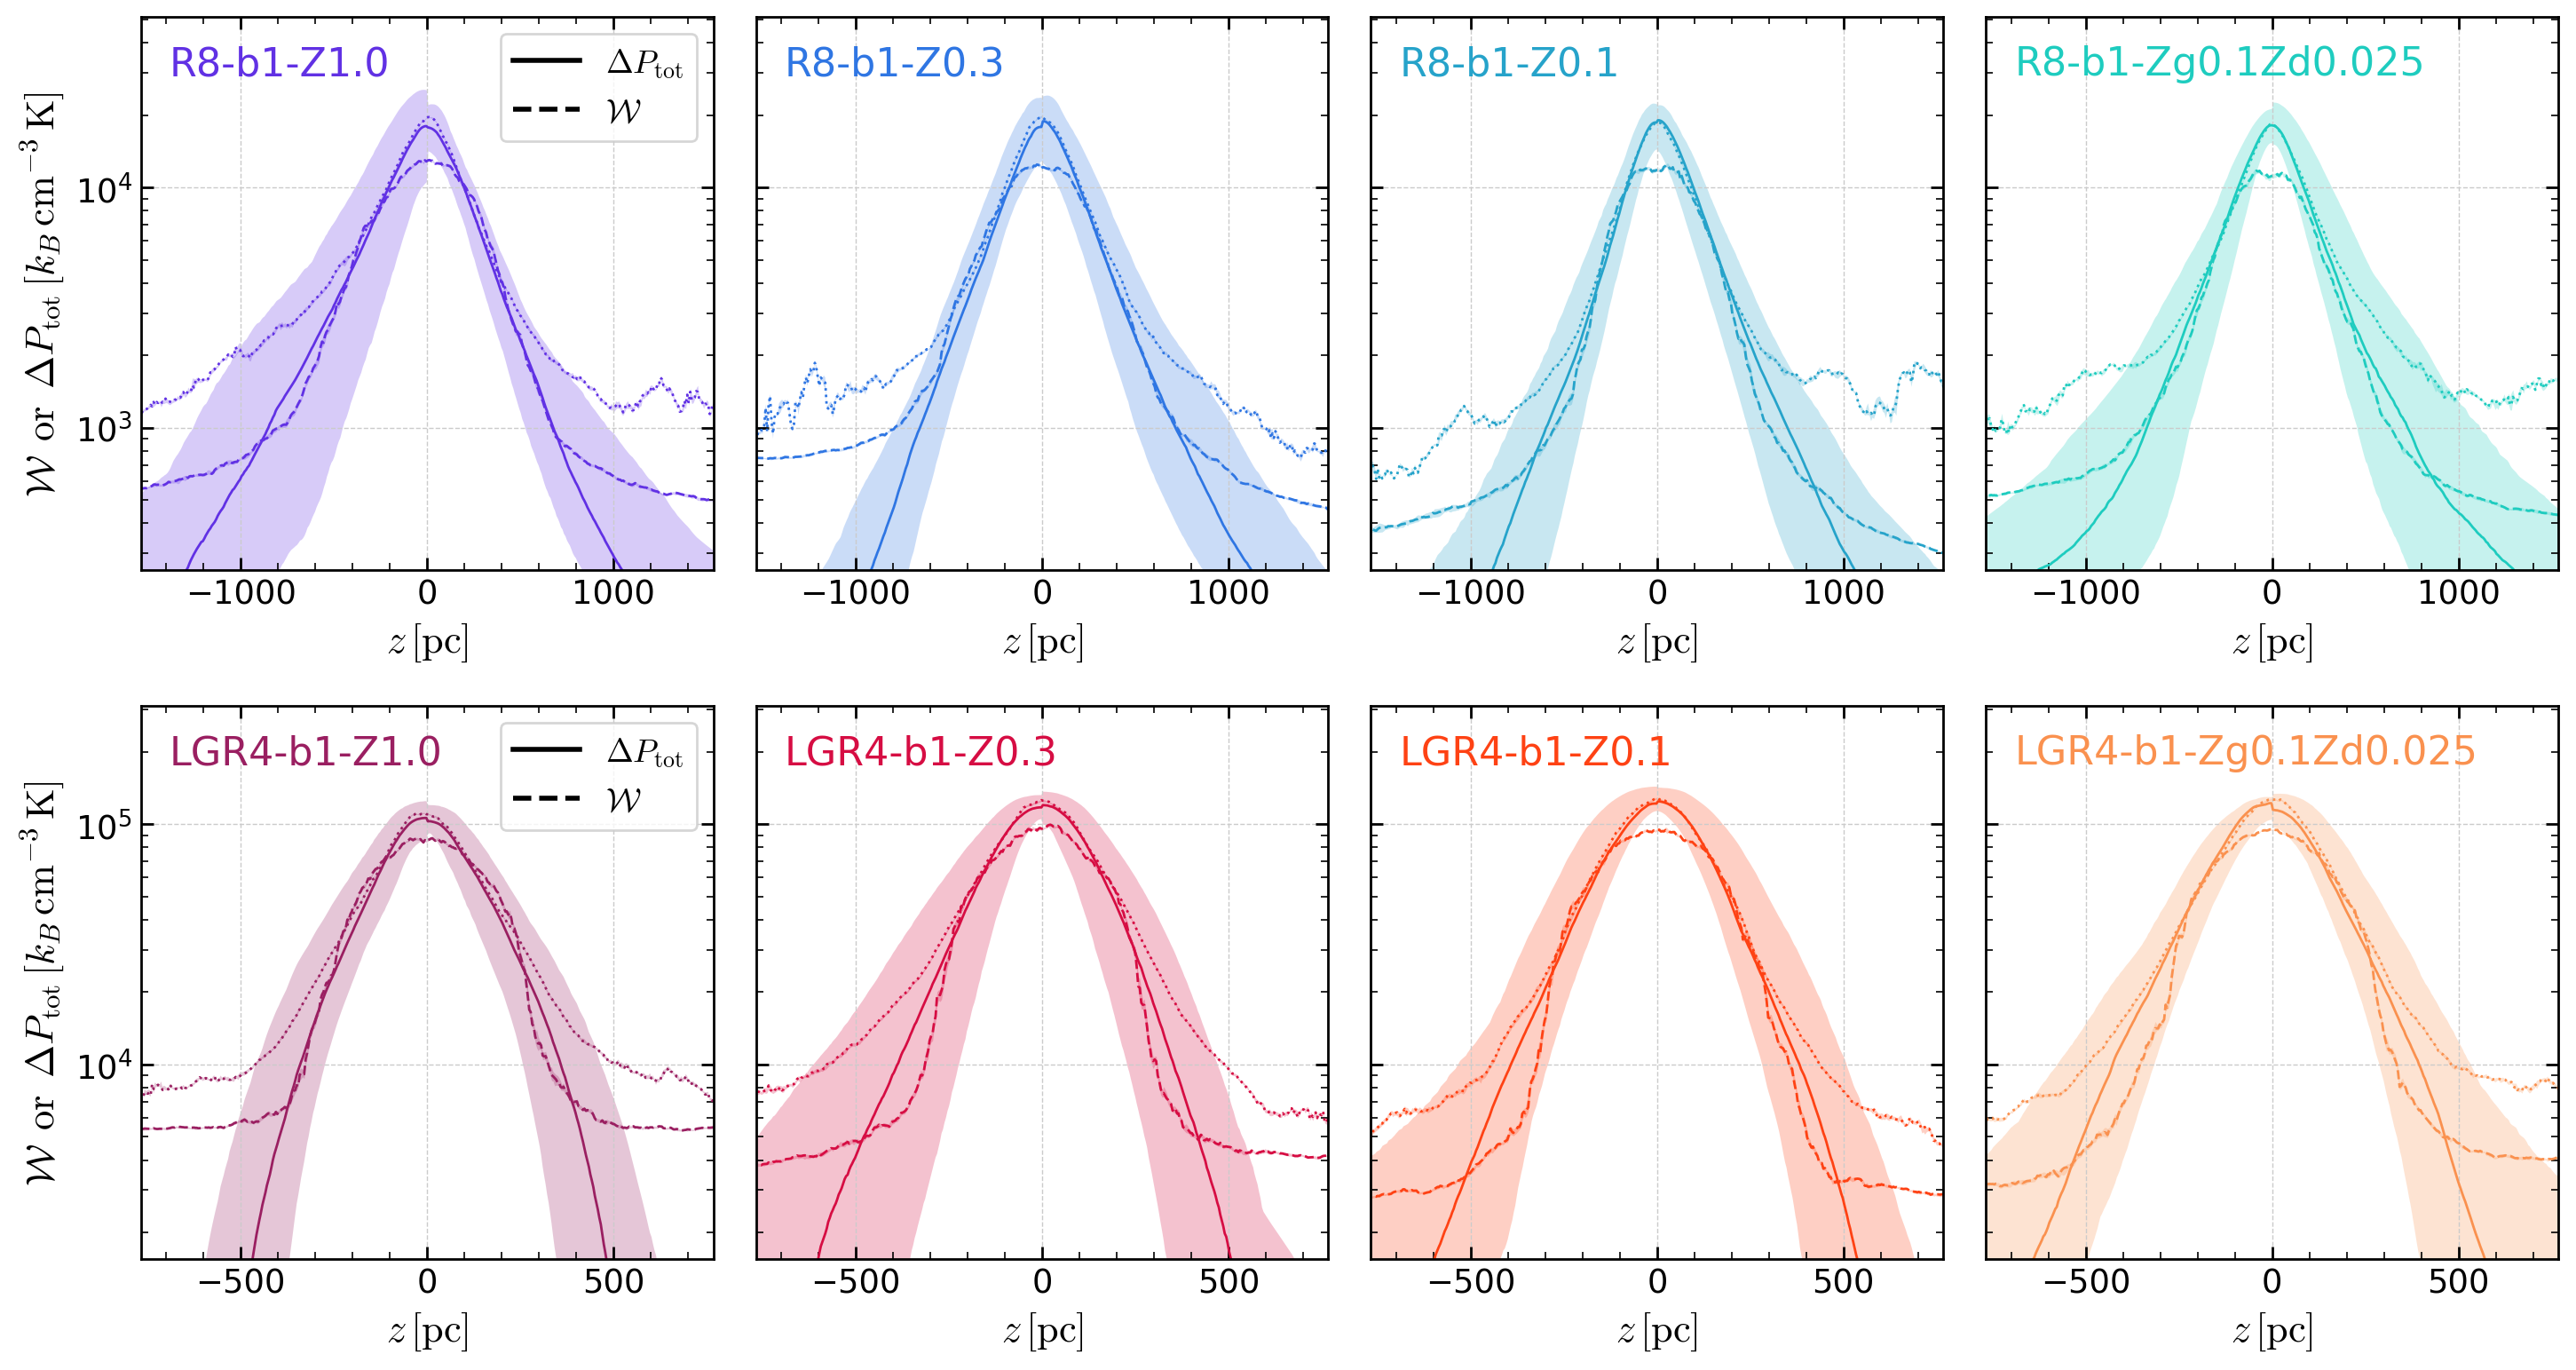

In [46]:
fig,axes = plt.subplots(2,4, figsize=(15,8), sharey='row')

for gr,axes_ in zip(['R8-b1','LGR4-b1'],axes):

    for m,ax in zip(pdata.mgroup[gr],axes_):
        plt.sca(ax)
        s = pdata.sa.set_model(m)
        zprof = s.zprof
        torb = pdata.torb_Myr[gr.split('-')[0]]
        hzmax = s.par['domain1']['x3max']*0.5

        trange = slice(torb*2,torb*5)
        # plt.sca(ax[0])
        W = zprof['W'].sum(dim='phase').sel(time=trange)*s.u.pok
        Wmin = W.sel(z=hzmax,method='nearest').mean(dim='time').data
        Wmin = 0
        plot_quantile(W-Wmin,color=s.color,lw=1,ls='-',label=s.name)
        # plt.sca(ax[1])
        P='Ptot'
        for ph,ls in zip(['2p','hot'],[':','--','-.']):
            Pcomp = zprof[P].sel(phase=ph,time=trange)
            area = zprof['A'].sel(phase=ph,time=trange)
            Ptot = Pcomp/area*s.u.pok
            # Ptot = zprof['Ptot'].sum(dim='phase').sel(time=trange)*s.u.pok
            # Pmin = Ptot.sel(z=hzmax,method='nearest').mean(dim='time').data
            Pmin=0.
            plot_quantile(Ptot-Pmin,qmin=0.49,qmax=0.51,color=s.color,lw=1,label=s.name,ls=ls)
        Wmax = W.max().data


    # plt.legend()
    # for ax_ in ax:
        # plt.sca(ax_)
        plt.yscale('log')
        plt.ylim(0.01*Wmax,2*Wmax)
        plt.xlim(-hzmax,hzmax)
        name = pdata.get_model_name(s,beta=True)
        plt.annotate(name,(0.05,0.95),xycoords='axes fraction',ha='left',va='top',color=s.color)

        plt.xlabel(r'$z\,[{\rm pc}]$')

from matplotlib.lines import Line2D
for ax in axes[:,0]:
    plt.sca(ax)
    plt.ylabel(r'$\mathcal{W}\,\,\,{\rm or}\,\,\,\Delta P_{\rm tot}\,[k_B\,{\rm cm^{-3}\,K}]$')

    labels = [r'$\Delta P_{\rm tot}$',r'$\mathcal{W}$',]
    custom_lines2 = [Line2D([0], [0], ls = '-', color='k'),
                     Line2D([0], [0], ls = '--', color='k')]
    plt.legend(custom_lines2,labels)
plt.tight_layout()
# plt.savefig(os.path.join(pdata.outdir,'W_P_zprof.png'),bbox_inches='tight')

In [39]:
xr.concat([zprof.sel(z=(slice(-1000,-900))),zprof.sel(z=(slice(900,1000)))],dim='z')

<xarray.Dataset>
Dimensions:    (z: 50, time: 701, phase: 3)
Coordinates:
  * z          (z) float64 -998.0 -994.0 -990.0 -986.0 ... 990.0 994.0 998.0
    time_code  (time) float64 150.0 150.5 151.0 151.5 ... 499.0 499.5 500.0
  * time       (time) float64 146.7 147.2 147.6 148.1 ... 487.9 488.4 488.9
    z_kpc      (z) float64 -0.998 -0.994 -0.99 -0.986 ... 0.986 0.99 0.994 0.998
  * phase      (phase) object '2p' 'WIM' 'hot'
Data variables: (12/25)
    Wext       (phase, z, time) float64 0.0489 0.02368 0.01754 ... 0.5764 0.5572
    Wsg        (phase, z, time) float64 0.04655 0.02254 ... 0.5085 0.4918
    W          (phase, z, time) float64 0.09545 0.04622 0.03425 ... 1.085 1.049
    frad_z0    (phase, z, time) float64 5.608e-05 1.999e-05 8.69e-06 ... 0.0 0.0
    frad_z1    (phase, z, time) float64 3.049e-05 1.535e-05 ... 0.000315
    frad_z2    (phase, z, time) float64 5.105e-05 2.514e-05 ... 0.0005263
    ...         ...
    heat       (phase, z, time) float64 0.0 0.1256 ... 1.088e-11 1.012e-11
    cool       (phase, z, time) float64 0.0 0.2571 0.105 ... 0.5917 0.3571 0.221
    net_cool   (phase, z, time) float64 0.0 0.1315 0.07883 ... 0.3571 0.221
    Erad0      (phase, z, time) float64 3.483e-06 2.342e-06 ... 0.0 0.0
    Erad1      (phase, z, time) float64 0.1281 0.06807 0.02237 ... 12.6 11.37
    Erad2      (phase, z, time) float64 0.3443 0.1789 0.05875 ... 33.99 30.84

In [ ]:
for gr in ['R8-b1','LGR4-b1']:
    for i,m in enumerate(pdata.mgroup[gr]):
        grhead=gr.split('-')[0]
        torb = pdata.torb_Myr[grhead]
        tr = slice(torb*1,torb*5)
        s = pdata.sa.set_model(m)
        plot_PWYbox(pdata,m,tr,i,4,label=s.name,Upsilon=False,legend=False)
plt.ylim(1.e3,5.e5)

In [ ]:
for j,gr in enumerate(['R8-b1','LGR4-b1']):
    for i,m in enumerate(pdata.mgroup[gr]):
        grhead=gr.split('-')[0]
        torb = pdata.torb_Myr[grhead]
        tr = slice(torb*2,torb*5)
        s = pdata.sa.set_model(m)
        plot_PWYbox(pdata,m,tr,i+j*4,8,label=s.name,Upsilon=True,legend=False)
plt.ylim(10,1.e4)